In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
Builds an array with an equal number of zeros and ones
and then mixes these.
'''
def create_array_solution(size):

    n_ones = int(size / 2)

    array = np.zeros(size)
    array[0: n_ones] = 1

    np.random.shuffle(array)
    
    return array

In [3]:
'''
Set up an initial array of all zeros
Loop through each row (individual)
Choose a random number of ones to create
Change the required number of zeros to ones
Sfuffle row
'''
def create_first_population(individuals, size):
    population = np.zeros((individuals, size))
    for i in range(individuals):
        number_of_ones = random.randint(0, size)
        population[i, 0:number_of_ones] = 1
        np.random.shuffle(population[i])
    
    return population

In [4]:
'''
Return the number of genes (elements) in a
potential solution (chromosome) that match the f-reference standard.
Create an array of True/False compared to reference.
Sum number of genes that are identical to the reference.
'''
def calc_fitness(reference, population):
    identical_to_reference = population == reference
    fitness_scores = identical_to_reference.sum(axis=1)
    
    return fitness_scores

In [5]:
'''
Get population size.
Pick individuals for tournament.
Get fitness score for each.
Identify undividual with highest fitness.
Fighter 1 will win if score are equal.
Return the chromsome of the winner.
'''
def tournament(population, scores):
    population_size = len(scores)
    
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    

    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    return population[winner, :]

In [6]:
'''
Get length of chromosome of parent 1.
Pick crossover point, avoding the ending bits of chromsome.
Create and return children using np.hstack.
'''
def crossover(parent_1, parent_2):
    chromosome_size = len(parent_1)
    
    crossover_point = random.randint(1,chromosome_size-1)
    
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    return child_1, child_2


In [7]:
'''
Apply random mutation.
Return mutated  population.
'''
def mutate(population, mutation_probability):
    
    random_mutation_array = np.random.random(
        size=(population.shape))
    
    random_mutation_boolean = \
        random_mutation_array <= mutation_probability

    population[random_mutation_boolean] = \
    np.logical_not(population[random_mutation_boolean])
    
    return population

In [8]:
def main() :
    chromosome_size = 75
    population_size = 500
    maximum_generation = 200
    best_score_progress = []

    reference = create_array_solution(chromosome_size)

    population = create_first_population(population_size, chromosome_size)

    scores = calc_fitness(reference, population)
    best_score = np.max(scores)/chromosome_size * 100
    print ('Starting best score, percent target: %.1f' %best_score)

    best_score_progress.append(best_score)

    # Generations
    for generation in range(maximum_generation):
        new_population = []
        
        # Create new popualtion generating two children at a time
        for i in range(int(population_size/2)):
            parent_1 = tournament(population, scores)
            parent_2 = tournament(population, scores)
            child_1, child_2 = crossover(parent_1, parent_2)
            new_population.append(child_1)
            new_population.append(child_2)
        
        population = np.array(new_population)
        
        mutation_rate = 0.002
        population = mutate(population, mutation_rate)

        scores = calc_fitness(reference, population)
        best_score = np.max(scores)/chromosome_size * 100
        best_score_progress.append(best_score)

    # GA has completed required generation
    print ('End best score, percent target: %.1f' %best_score)

    plt.plot(best_score_progress)
    plt.xlabel('Generation')
    plt.ylabel('Best score (% target)')
    plt.show()


Starting best score, percent target: 68.0
End best score, percent target: 100.0


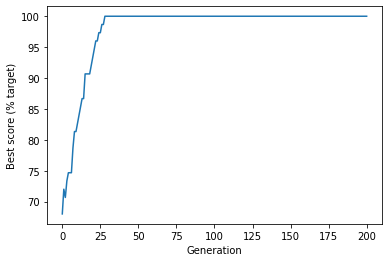

In [9]:
if __name__ == "__main__":
    main()